In [24]:
from tensorflow.keras.models import load_model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import BatchNormalization
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report,confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import random

# Load the saved .h5 model
model = load_model('vgg8class.h5')

train_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(70)\train'
valid_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(70)\valid'
test_dir = r'C:\Users\Leister\Desktop\School\Thesis\Split_Data(70)\test'

# Create ImageDataGenerator instances for training, validation, and test sets
datagen = ImageDataGenerator(rescale=1.0/255.0)


train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=64,
    class_mode='categorical',
    shuffle=False
)



Found 560 images belonging to 8 classes.
Found 120 images belonging to 8 classes.
Found 120 images belonging to 8 classes.


2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step
Test accuracy: 85.00%


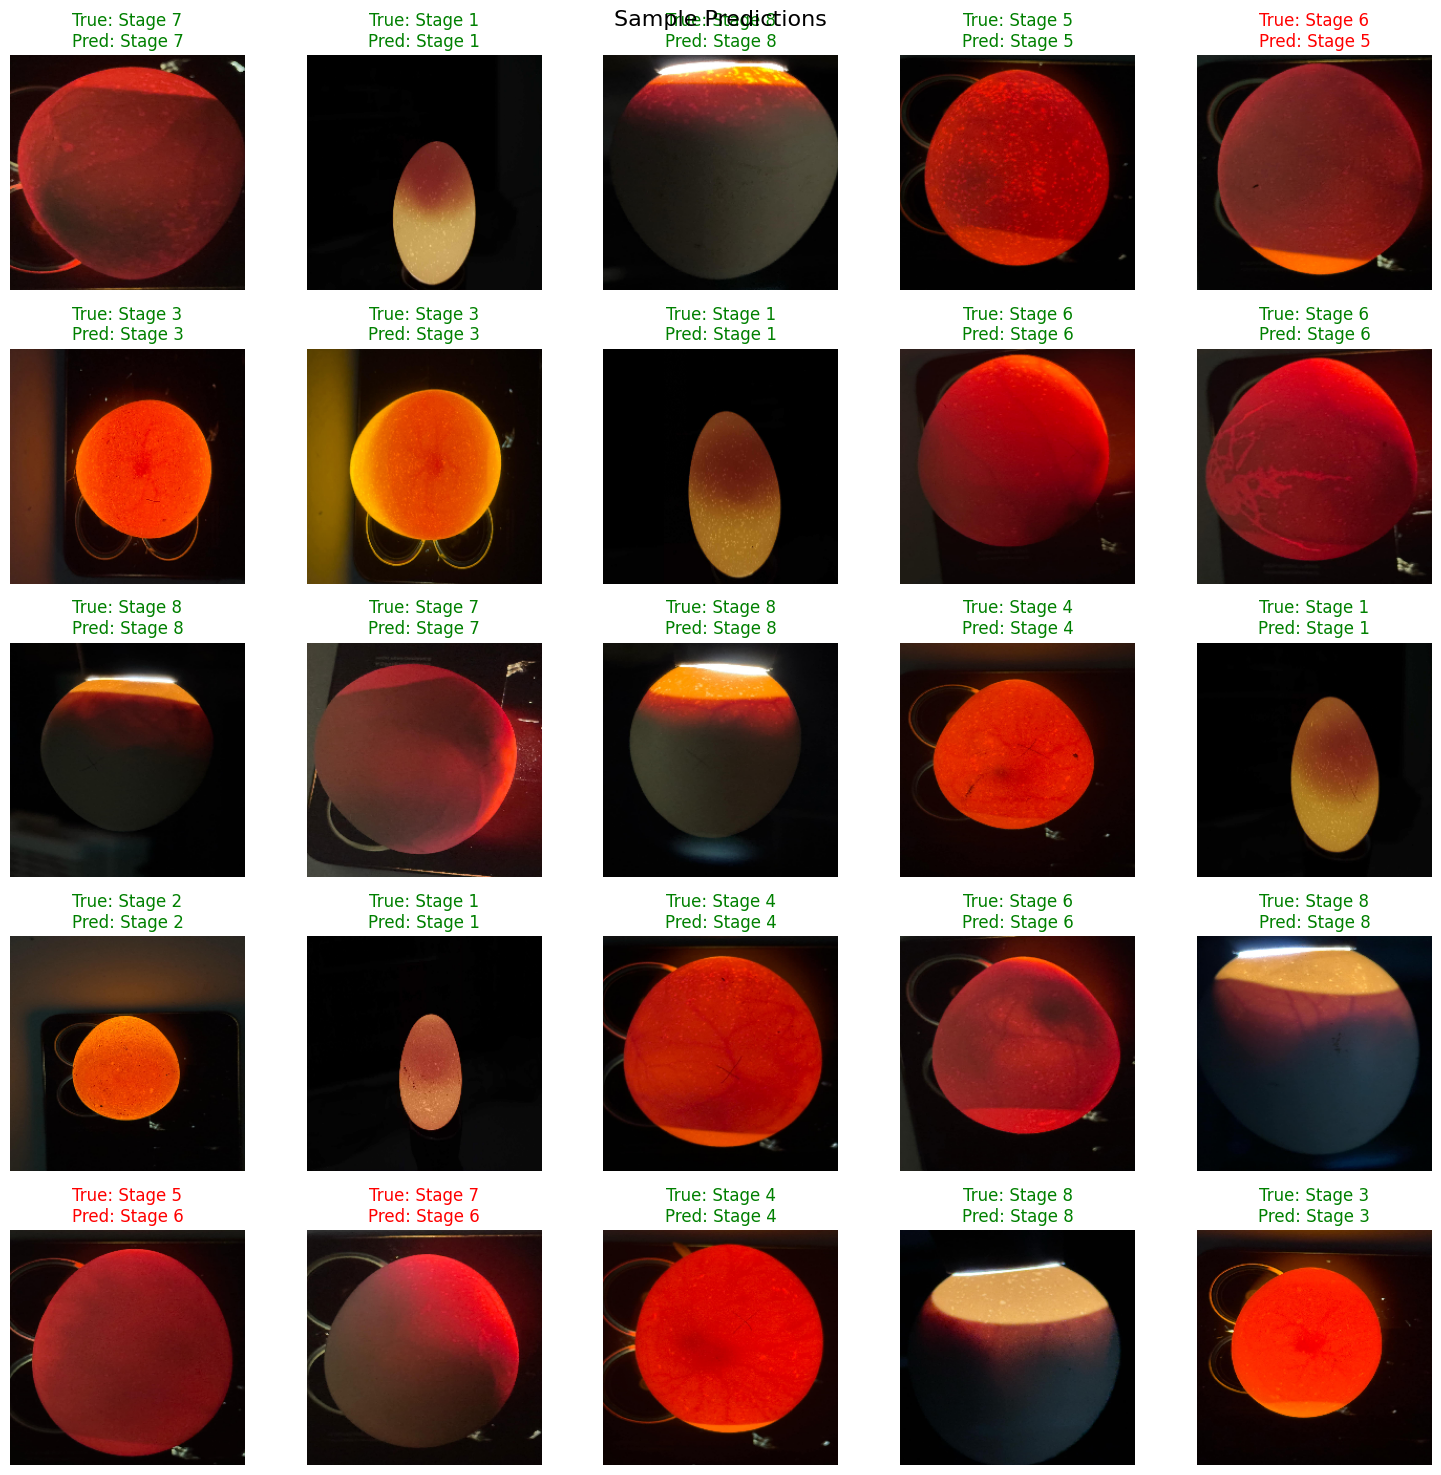

In [25]:
# Evaluate the model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Calculate accuracy manually
test_acc = np.sum(y_pred_classes == true_classes) / len(true_classes)
acc = test_acc * 100
print(f'Test accuracy: {acc:.2f}%')

# Visualize a sample of predictions
# Reset the test generator to ensure we're getting images in the correct order
test_generator.reset()

# Get the mapping from indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Collect all images and labels from the generator
all_images = []
all_labels = []

# Get all images from generator
for i in range(len(test_generator)):
    batch_images, batch_labels = next(test_generator)
    all_images.extend(batch_images)
    all_labels.extend(batch_labels)

# Randomly select a sample of images to display
sample_size = 25  # Number of images to display
sample_indices = random.sample(range(len(true_classes)), sample_size)

plt.figure(figsize=(15, 15))
grid_size = int(np.ceil(np.sqrt(sample_size)))

for i, idx in enumerate(sample_indices):
    plt.subplot(grid_size, grid_size, i + 1)
    img = all_images[idx]
    
    # For grayscale images, squeeze the extra dimension
    if img.shape[-1] == 1:
        img = np.squeeze(img, axis=-1)
        
    plt.imshow(img)
    
    true_label = class_names[true_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    
    # Set title color based on correct/incorrect prediction
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
    plt.axis('off')

plt.suptitle("Sample Predictions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 544ms/step
Test accuracy: 89.17%


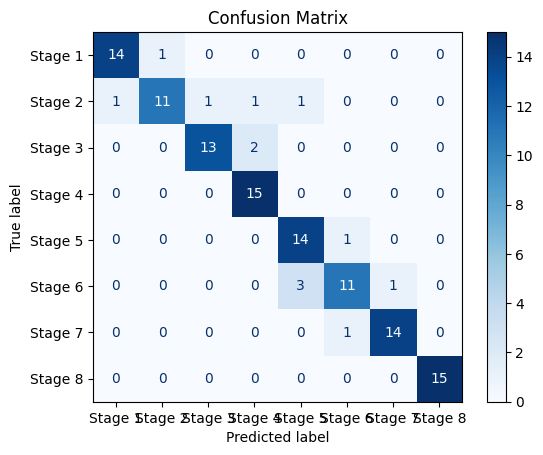

Classification Report:
              precision    recall  f1-score   support

     Stage 1       0.93      0.93      0.93        15
     Stage 2       0.92      0.73      0.81        15
     Stage 3       0.93      0.87      0.90        15
     Stage 4       0.83      1.00      0.91        15
     Stage 5       0.78      0.93      0.85        15
     Stage 6       0.85      0.73      0.79        15
     Stage 7       0.93      0.93      0.93        15
     Stage 8       1.00      1.00      1.00        15

    accuracy                           0.89       120
   macro avg       0.90      0.89      0.89       120
weighted avg       0.90      0.89      0.89       120



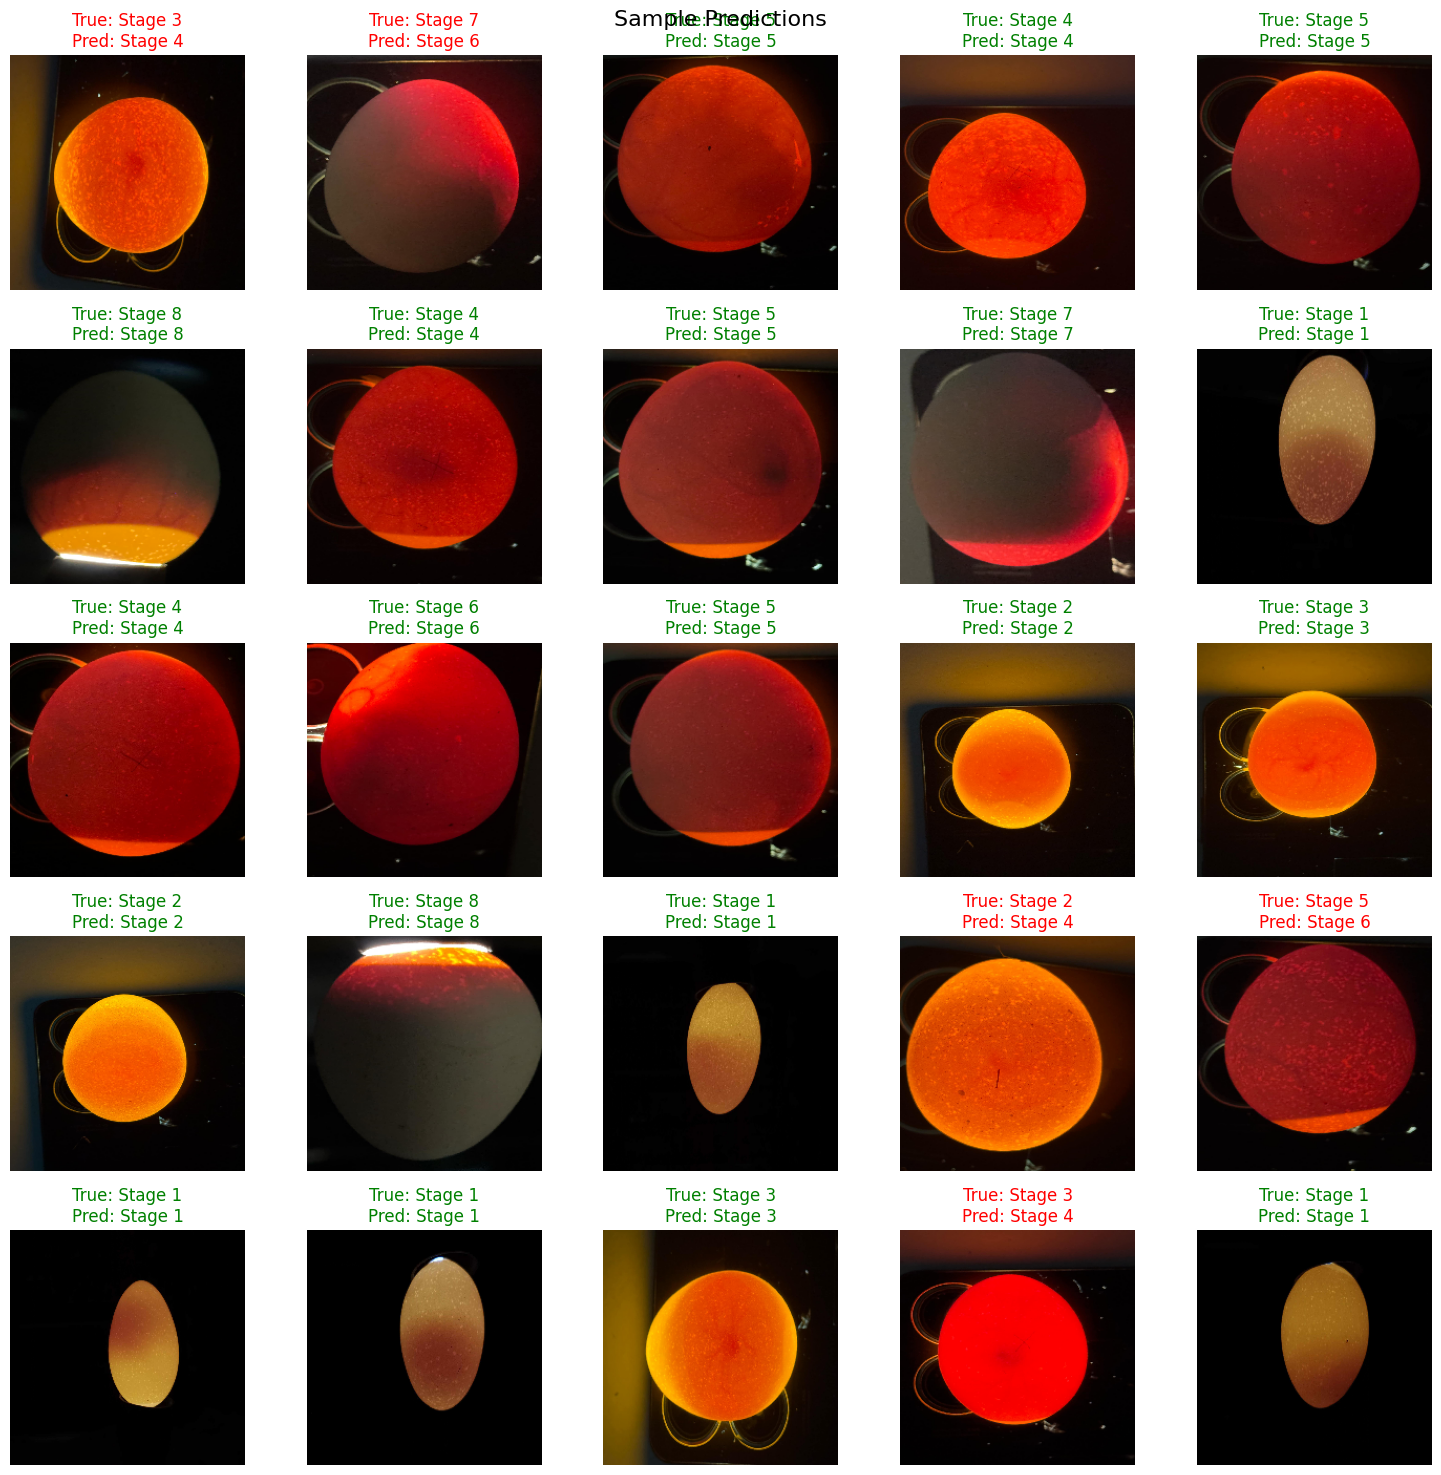

In [6]:
# Evaluate the model
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
true_classes = test_generator.classes

# Calculate accuracy manually
test_acc = np.sum(y_pred_classes == true_classes) / len(true_classes)
acc = test_acc * 100

print(f'Test accuracy: {acc:.2f}%')

# Compute the confusion matrix
cm = confusion_matrix(true_classes, y_pred_classes)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, y_pred_classes, target_names=class_labels)
print(f'Classification Report:\n{report}')


# Visualize a sample of predictions
# Reset the test generator to ensure we're getting images in the correct order
test_generator.reset()

# Get the mapping from indices to class names
class_indices = test_generator.class_indices
class_names = {v: k for k, v in class_indices.items()}

# Collect all images and labels from the generator
all_images = []
all_labels = []

# Get all images from generator
for i in range(len(test_generator)):
    batch_images, batch_labels = next(test_generator)
    all_images.extend(batch_images)
    all_labels.extend(batch_labels)

# Randomly select a sample of images to display
sample_size = 25  # Number of images to display
sample_indices = random.sample(range(len(true_classes)), sample_size)

plt.figure(figsize=(15, 15))
grid_size = int(np.ceil(np.sqrt(sample_size)))

for i, idx in enumerate(sample_indices):
    plt.subplot(grid_size, grid_size, i + 1)
    img = all_images[idx]
    
    # For grayscale images, squeeze the extra dimension
    if img.shape[-1] == 1:
        img = np.squeeze(img, axis=-1)
        
    plt.imshow(img)
    
    true_label = class_names[true_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    
    # Set title color based on correct/incorrect prediction
    title_color = 'green' if true_label == pred_label else 'red'
    plt.title(f"True: {true_label}\nPred: {pred_label}", color=title_color)
    plt.axis('off')

plt.suptitle("Sample Predictions", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()




In [ ]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_generator)
acc = test_acc * 100

print(f'Test accuracy: {acc}')


y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred_classes)


# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(test_generator.class_indices.keys()))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


# Generate classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(test_generator.classes, y_pred_classes, target_names=class_labels)
print(f'Classification Report:\n{report}')

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper left')

plt.show()